## Monthly Trends Exploration

### Purpose
In this notebook, we analyze **monthly patterns** of temperature and rainfall across regions.  
The goal is to identify:
- Which months have the **highest** and **lowest** temperatures/rainfall.
- Seasonal trends and outliers.
- Regional differences in monthly behavior.

### Why it matters
Understanding monthly variations helps:
- Farmers plan planting and irrigation cycles.
- Governments prepare for droughts or floods.
- Model builders design better **features** (e.g., seasonal averages) for ML.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../1_datasets/Final_dataset/final_merged_dataset.csv")

df.head()


,REGION,YEAR,JAN_RAIN,FEB_RAIN,MAR_RAIN,APR_RAIN,MAY_RAIN,JUN_RAIN,JUL_RAIN,AUG_RAIN,...,APR_TEMP,MAY_TEMP,JUN_TEMP,JUL_TEMP,AUG_TEMP,SEP_TEMP,OCT_TEMP,NOV_TEMP,DEC_TEMP,ANN_TEMP
0,Central,1990,0.0,0.0,0.000000,0.000000,0.002000,0.026667,1.387333,0.429333,...,30.844667,33.960222,33.907000,32.037444,32.395111,32.977667,32.436444,29.210333,27.665444,28.028111
1,Central,1991,0.0,0.0,0.000000,0.047333,0.216000,0.036667,0.713333,1.087333,...,33.137556,35.484000,34.458778,32.991222,31.911333,33.060556,32.269778,27.483222,22.874889,28.717444
2,Central,1992,0.0,0.0,0.000000,0.003000,0.292333,0.145000,1.118000,2.190333,...,30.957444,32.862667,33.887667,32.620111,30.592222,31.677111,31.273667,26.608444,21.895444,26.553889
3,Central,1993,0.0,0.0,0.000333,0.119333,0.646333,0.173667,3.025000,2.957667,...,30.436333,32.704222,32.951444,31.131556,30.119111,30.464778,30.612667,28.435111,24.960222,26.655667
4,Central,1994,0.0,0.0,0.000000,0.000000,0.389333,0.144667,2.592000,1.556667,...,31.737556,33.064222,33.141778,30.683111,30.624778,31.021778,31.593778,25.942444,22.093889,27.520667


Before diving into visuals, recall that:
- We have 5 regions (North, South, East, West, Central)
- Data covers 1990–2024
- Each month has rainfall (`JAN_RAIN`, `FEB_RAIN`, …) and temperature (`JAN_TEMP`, `FEB_TEMP`, …)

We’ll reshape the data to make monthly analysis easier.

We’ll convert from wide to long format — so instead of 12 columns for rainfall, we’ll have one column for Month, Rainfall and Temperature.

In [7]:
# Melt rainfall columns
rain_cols = [col for col in df.columns if "_RAIN" in col]
temp_cols = [col for col in df.columns if "_TEMP" in col]

rain_melted = df.melt(id_vars=['YEAR', 'REGION'], value_vars=rain_cols, 
                    var_name='Month', value_name='Rainfall')
temp_melted = df.melt(id_vars=['YEAR', 'REGION'], value_vars=temp_cols, 
                    var_name='Month', value_name='Temperature')

# Clean month names (remove _RAIN/_TEMP)
rain_melted['Month'] = rain_melted['Month'].str.replace('_RAIN', '')
temp_melted['Month'] = temp_melted['Month'].str.replace('_TEMP', '')

# Merge both on YEAR, REGION, Month
monthly_df = pd.merge(rain_melted, temp_melted, on=['YEAR', 'REGION', 'Month'])

monthly_df.head()



,YEAR,REGION,Month,Rainfall,Temperature
0,1990,Central,JAN,0.0,23.057667
1,1991,Central,JAN,0.0,22.685222
2,1992,Central,JAN,0.0,21.373889
3,1993,Central,JAN,0.0,22.352778
4,1994,Central,JAN,0.0,25.334111


## Average Monthly Patterns

We’ll start by averaging rainfall and temperature by month across **all years** and **regions**.
This helps us identify general seasonal cycles.


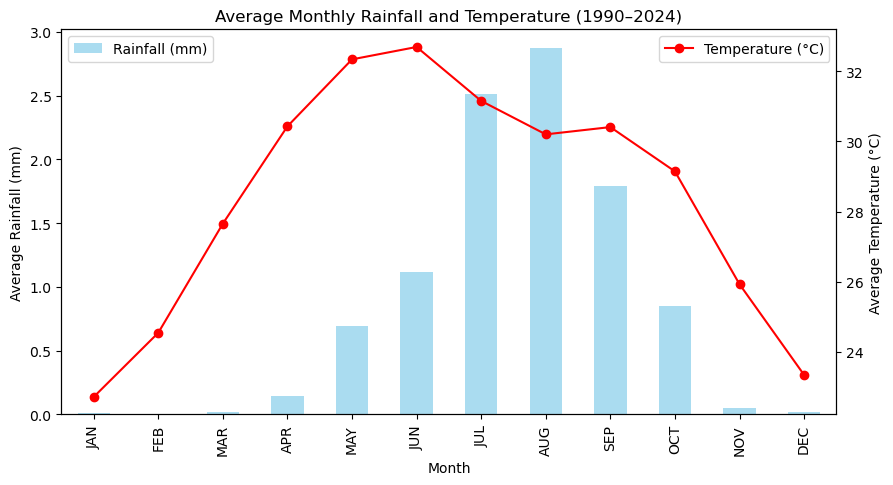

In [8]:
monthly_avg = monthly_df.groupby('Month')[['Rainfall', 'Temperature']].mean().reindex([
    'JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'
])

fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()

monthly_avg['Rainfall'].plot(kind='bar', ax=ax1, color='skyblue', alpha=0.7, label='Rainfall (mm)')
monthly_avg['Temperature'].plot(kind='line', ax=ax2, color='red', marker='o', label='Temperature (°C)')

ax1.set_ylabel('Average Rainfall (mm)')
ax2.set_ylabel('Average Temperature (°C)')
ax1.set_title('Average Monthly Rainfall and Temperature (1990–2024)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()
